# Bio-Signal Analysis for Smoking Prediction

## Problems

Binary Classification $\begin{cases}1&\text{smoking}\\0&\text{No smoking}\end{cases}$

Conducting analysis on bio-signals
Identifying smoking patterns based on certain features: based on the provided data, such as age, gender, and health indicators
Assesing health indicators : Evaluate the impact of smoking on various health indicators, such as hemoglobin, gender, and age, to better understand its health consequences
Identinfying key health indicators affected when a person is a smoker

## Import library & load data

In [74]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install Jinja2  
# needed by dataframe.format
!pip install scipy 
# needed by kendall measurement


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl (294 kB)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [58]:
smoking = pd.read_csv("./data/smoking.csv")
df = smoking.drop("ID", axis = 1)

df.rename(
    columns = {"height(cm)" : "height_cm", "weight(kg)" : "weight_kg", "waist(cm)" : "waist_cm", 
               "eyesight(left)" : "eyesight_left", "eyesight(right)" : "eyesight_right", 
               "hearing(left)" : "hearing_left", "hearing(right)" : "hearing_right", 
               "fasting blood sugar" : "fasting_blood_sugar", "Cholesterol" : "cholesterol", 
               "HDL" : "hdl", "LDL" : "ldl", "Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
               "AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
        inplace = True)

In [4]:
df.head(5)

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## EDA

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ldl                  55692 non-null 

In [6]:
print(df.apply(np.unique, axis=0))

gender                                                            [F, M]
age                    [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 7...
height_cm              [130, 135, 140, 145, 150, 155, 160, 165, 170, ...
weight_kg              [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 8...
waist_cm               [51.0, 53.0, 54.0, 55.0, 56.0, 56.2, 56.4, 56....
eyesight_left          [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ...
eyesight_right         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ...
hearing_left                                                  [1.0, 2.0]
hearing_right                                                 [1.0, 2.0]
systolic               [71.0, 72.0, 74.0, 79.0, 80.0, 81.0, 82.0, 83....
relaxation             [40.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49....
fasting_blood_sugar    [46.0, 48.0, 51.0, 54.0, 55.0, 56.0, 57.0, 58....
cholesterol            [55.0, 72.0, 77.0, 84.0, 86.0, 87.0, 90.0, 91....
triglyceride           [8.0, 11.0, 15.0, 16.0, 19.0

From decription information befroe:
1.  There are totally 0 null values in the dataset. 
2.  Of the variables' data types, 18 are float, 5 are integer and 3 are object.
3.  All oral values are Y. So the variable oral can not help.

smoking          None
gender           None
urine_protein    None
dental_caries    None
tartar           None
dtype: object

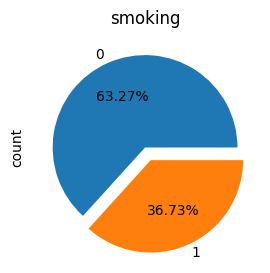

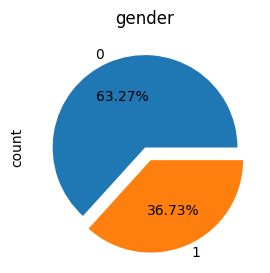

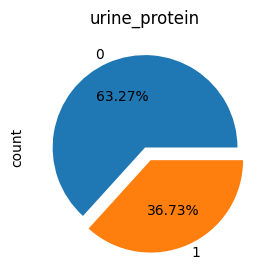

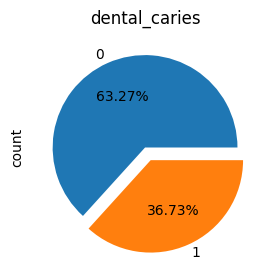

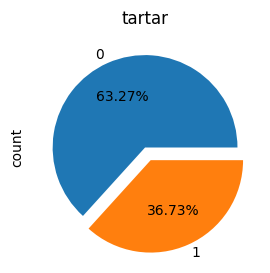

In [7]:
def pie_plt(data):
    plt.figure(figsize = [3, 3], clear = True)
    plt.title(data.name)
    df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%')

df[['smoking', 'gender', 'urine_protein', 'dental_caries', 'tartar']].apply(pie_plt, axis=0)

From pie chart of smoking, it is a unbalanced dataset

In [59]:
df = df.drop('oral', axis=1)
df['gender'] = df['gender'].map({'M':1, 'F':0})
df['tartar'] = df['tartar'].map({'Y':1, 'N':0})
df.head(3)

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1


In [60]:
df.corr().style.format('{:.2f}').background_gradient(cmap = "Oranges") # Pearson, linear relationship

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
gender,1.00,-0.29,0.74,0.57,0.42,0.13,0.13,-0.01,-0.01,0.17,0.18,0.10,-0.09,0.24,-0.31,-0.04,0.70,0.02,0.51,0.10,0.17,0.24,0.08,0.06,0.51
age,-0.29,1.00,-0.48,-0.32,-0.03,-0.20,-0.19,0.20,0.21,0.13,0.05,0.18,0.06,0.02,0.01,0.04,-0.26,0.03,-0.11,0.03,-0.06,0.01,-0.11,-0.08,-0.16
height_cm,0.74,-0.48,1.00,0.68,0.38,0.15,0.16,-0.08,-0.08,0.08,0.11,0.02,-0.08,0.16,-0.21,-0.05,0.54,0.01,0.38,0.04,0.13,0.14,0.08,0.06,0.40
weight_kg,0.57,-0.32,0.68,1.00,0.82,0.11,0.11,-0.05,-0.05,0.27,0.27,0.14,0.03,0.32,-0.36,0.04,0.49,0.03,0.32,0.12,0.25,0.21,0.07,0.06,0.30
waist_cm,0.42,-0.03,0.38,0.82,1.00,0.03,0.04,0.02,0.02,0.32,0.29,0.21,0.07,0.36,-0.38,0.07,0.39,0.05,0.24,0.14,0.25,0.24,0.04,0.05,0.23
eyesight_left,0.13,-0.20,0.15,0.11,0.03,1.00,0.35,-0.05,-0.05,-0.02,0.01,-0.04,-0.00,0.02,-0.02,-0.01,0.10,-0.00,0.07,-0.01,0.02,0.00,0.00,0.01,0.06
eyesight_right,0.13,-0.19,0.16,0.11,0.04,0.35,1.00,-0.04,-0.05,-0.01,0.01,-0.04,-0.01,0.02,-0.02,-0.01,0.10,-0.01,0.05,-0.01,0.02,0.01,0.02,0.01,0.06
hearing_left,-0.01,0.20,-0.08,-0.05,0.02,-0.05,-0.04,1.00,0.51,0.06,0.01,0.04,-0.02,0.00,-0.02,-0.02,-0.03,0.01,0.00,0.02,0.00,0.01,-0.02,-0.04,-0.02
hearing_right,-0.01,0.21,-0.08,-0.05,0.02,-0.05,-0.05,0.51,1.00,0.05,0.00,0.04,-0.02,0.00,-0.02,-0.02,-0.03,0.02,0.01,0.01,-0.01,0.01,-0.02,-0.03,-0.02
systolic,0.17,0.13,0.08,0.27,0.32,-0.02,-0.01,0.06,0.05,1.00,0.76,0.17,0.06,0.20,-0.09,0.02,0.19,0.05,0.07,0.08,0.09,0.17,0.03,0.01,0.07


From the correlation heatmap, smoking has a closer linear correlation with gender(0.51), hemoglobin(0.40), height(0.40), weight(0.30). 


However, according to common sence, height should not be one of factors to smoking. It can seen that height has a closer linear correlation with gender(0.74), weight(0.68), hemoglobin(0.54) which are much related to smoking. $\impliedby$ **Guess 1 Colinear Problem exists.**

### gender

array([<Axes: ylabel='No smoking'>, <Axes: ylabel='Smoking'>],
      dtype=object)

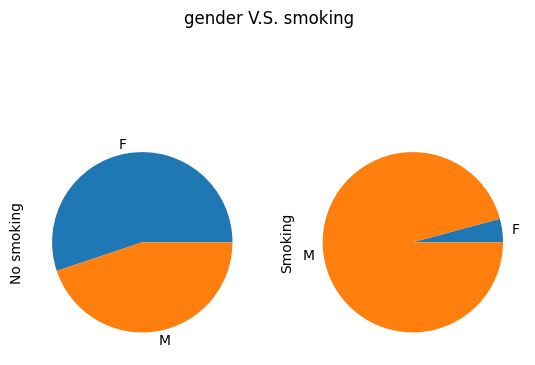

In [66]:
plt.style.use('default')

pd.crosstab(df['gender'].map({0:'F', 1:'M'}), df['smoking'].map({0: 'No smoking', 1:'Smoking'})
            ).plot(kind='pie', subplots=True, stacked=True, title='gender V.S. smoking', legend=False )

### hemoglobin

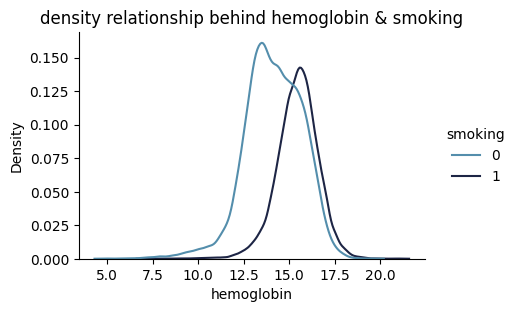

In [86]:
sns.displot(
    data=df, x='hemoglobin', hue='smoking',
    kind='kde', height=3, aspect=1.5,
    palette="ch:rot=-.25,hue=1,light=.50"
).set(title='density relationship behind hemoglobin & smoking')

In [125]:
df[df['gender']==0]

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
8,0,50,150,60,85.0,0.7,0.8,1.0,1.0,115.0,...,149.0,13.7,1.0,0.8,31.0,31.0,14.0,0,0,0
13,0,40,155,45,59.0,1.5,1.2,1.0,1.0,95.0,...,57.0,12.6,1.0,0.7,13.0,9.0,9.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55681,0,45,160,65,75.0,1.2,1.2,1.0,1.0,131.0,...,93.0,12.6,1.0,0.8,27.0,21.0,13.0,0,1,0
55686,0,60,150,50,75.0,1.0,1.2,1.0,1.0,102.0,...,116.0,12.6,1.0,0.8,26.0,21.0,14.0,0,1,0
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0


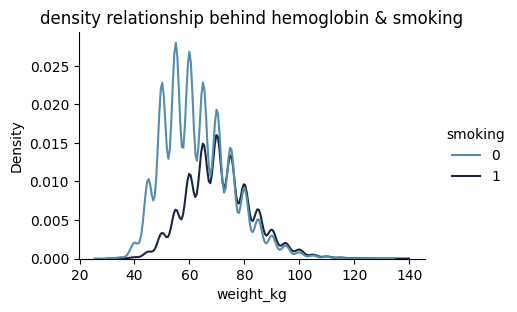

In [139]:
sns.displot(
    data=df, x='weight_kg', hue='smoking', 
    kind='kde', height=3, aspect=1.5,
    palette="ch:rot=-.25,hue=1,light=.50"
).set(title='density relationship behind hemoglobin & smoking')

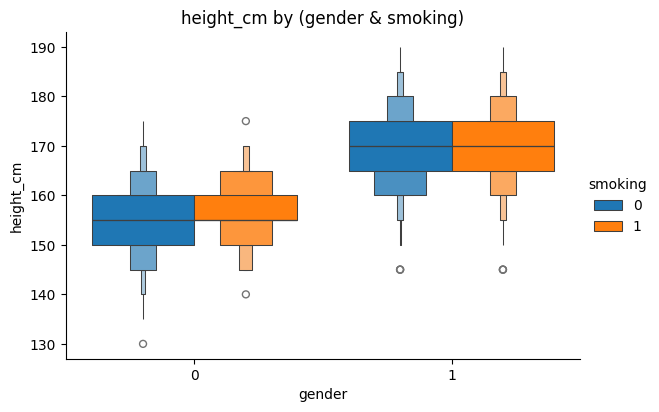

In [120]:
sns.catplot(data=df, x='gender', y='height_cm', hue='smoking',
            kind='boxen', saturation=1, height=4, aspect=1.5 
            ).set(title='height_cm by (gender & smoking)')

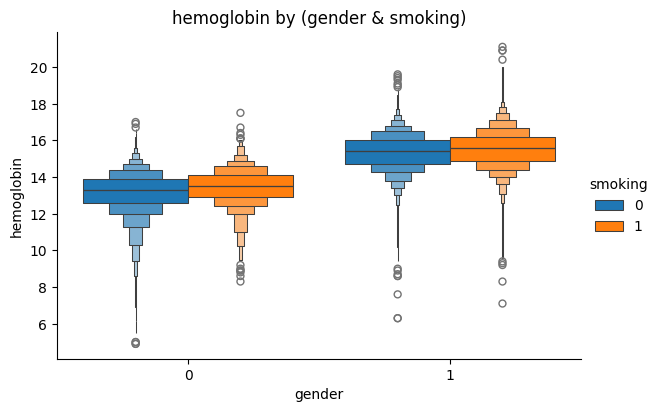

In [119]:
sns.catplot(data=df, x='gender', y='hemoglobin', hue='smoking',
            kind='boxen', saturation=1, height=4, aspect=1.5 
            ).set(title='hemoglobin by (gender & smoking)')

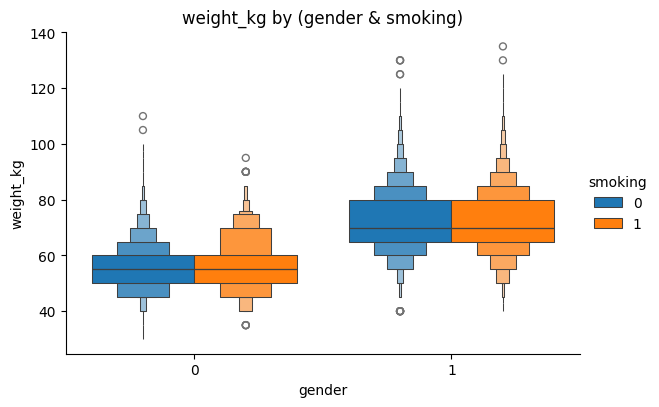

In [121]:
sns.catplot(data=df, x='gender', y='weight_kg', hue='smoking',
            kind='boxen', saturation=1, height=4, aspect=1.5 
            ).set(title='weight_kg by (gender & smoking)')